In [2]:
import pandas
import random
import keras
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.image as img
import matplotlib.pyplot as plt

In [1]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/dhruvildave/english-handwritten-characters-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

Your Kaggle Key:Downloading english-handwritten-characters-dataset.zip to ./english-handwritten-characters-dataset


100%|██████████| 13.1M/13.1M [00:03<00:00, 4.01MB/s]


In [4]:
data_path = "english-handwritten-characters-dataset"
dataset = pandas.read_csv(data_path + '/english.csv')
rand = random.sample(range(len(dataset)), 500)
validation_set = pandas.DataFrame(dataset.iloc[rand, :].values, columns=['image', 'label'])
# remove the added data
dataset.drop(rand, inplace=True)

rand = random.sample(range(len(validation_set)), 5)
test_set = pandas.DataFrame(validation_set.iloc[rand, :].values, columns=['image', 'label'])
# remove the added data
validation_set.drop(rand, inplace=True)
print(test_set)

                image label
0  Img/img052-001.png     p
1  Img/img061-011.png     y
2  Img/img051-032.png     o
3  Img/img008-048.png     7
4  Img/img034-032.png     X


In [5]:
train_data_generator = ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2)
data_generator = ImageDataGenerator(rescale=1/255)
training_data_frame = train_data_generator.flow_from_dataframe(dataframe=dataset, directory=data_path, x_col='image', y_col='label', 
                                                               target_size=(64, 64), class_mode='categorical')
validation_data_frame = data_generator.flow_from_dataframe(dataframe=validation_set, directory=data_path, x_col='image', y_col='label', 
                                                           target_size=(64, 64), class_mode='categorical')
test_data_frame = data_generator.flow_from_dataframe(dataframe=test_set, directory=data_path, x_col='image', y_col='label', 
                                                     target_size=(64, 64), class_mode='categorical', shuffle=False)

Found 2910 validated image filenames belonging to 62 classes.
Found 495 validated image filenames belonging to 62 classes.
Found 5 validated image filenames belonging to 5 classes.


In [6]:
cnn = tf.keras.models.Sequential()

# add convolutional and pooling layer
cnn.add(tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

In [7]:
cnn.add(tf.keras.layers.Dense(units=600, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=62, activation='sigmoid'))

# compile cnn
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.fit(x=training_data_frame, validation_data=validation_data_frame, epochs=30)

Epoch 1/30


2023-08-05 07:49:57.395220: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


91/91 [==============================] - ETA: 0s - loss: 3.5307 - accuracy: 0.1426

2023-08-05 07:50:50.419985: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


91/91 [==============================] - 61s 672ms/step - loss: 3.5307 - accuracy: 0.1426 - val_loss: 2.3211 - val_accuracy: 0.3636
Epoch 2/30
91/91 [==============================] - 60s 665ms/step - loss: 1.7693 - accuracy: 0.5247 - val_loss: 1.8304 - val_accuracy: 0.5293
Epoch 3/30
91/91 [==============================] - 61s 669ms/step - loss: 1.0991 - accuracy: 0.6832 - val_loss: 1.3793 - val_accuracy: 0.6404
Epoch 4/30
91/91 [==============================] - 61s 670ms/step - loss: 0.7964 - accuracy: 0.7591 - val_loss: 1.2519 - val_accuracy: 0.6970
Epoch 5/30
91/91 [==============================] - 84s 931ms/step - loss: 0.5872 - accuracy: 0.8168 - val_loss: 1.3128 - val_accuracy: 0.6990
Epoch 6/30
91/91 [==============================] - 61s 666ms/step - loss: 0.4867 - accuracy: 0.8512 - val_loss: 1.3718 - val_accuracy: 0.6990
Epoch 7/30
91/91 [==============================] - 61s 666ms/step - loss: 0.3504 - accuracy: 0.8849 - val_loss: 1.2645 - val_accuracy: 0.7273
Epoch 8/30

Prediction mapping:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35, 'a': 36, 'b': 37, 'c': 38, 'd': 39, 'e': 40, 'f': 41, 'g': 42, 'h': 43, 'i': 44, 'j': 45, 'k': 46, 'l': 47, 'm': 48, 'n': 49, 'o': 50, 'p': 51, 'q': 52, 'r': 53, 's': 54, 't': 55, 'u': 56, 'v': 57, 'w': 58, 'x': 59, 'y': 60, 'z': 61}


2023-08-05 08:22:56.127384: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 0s 209ms/step
Max index:  [51, 42, 50, 7, 33]


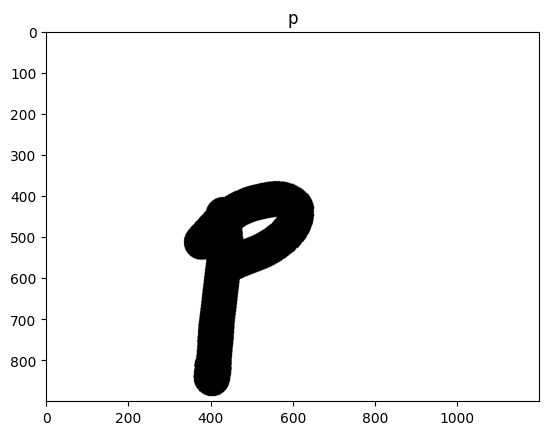

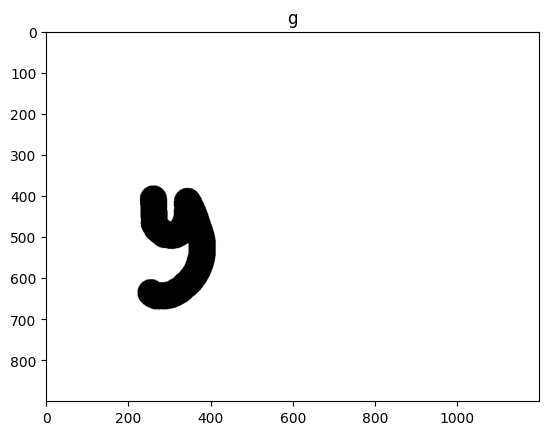

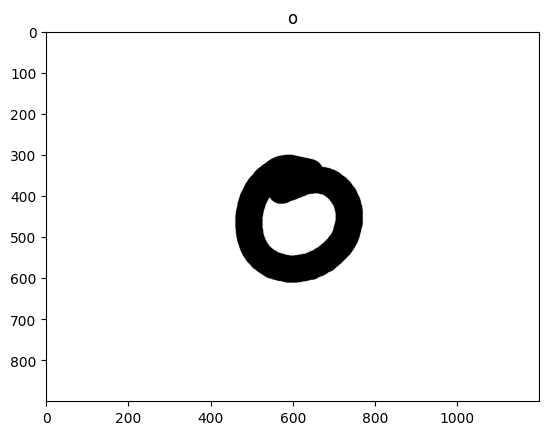

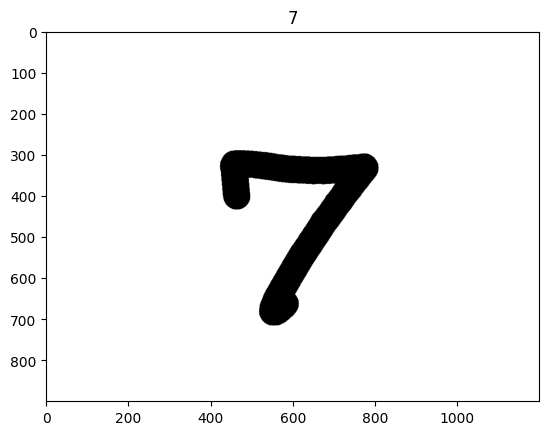

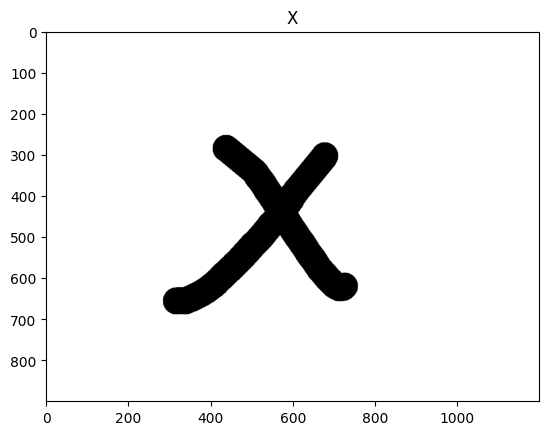

In [8]:
print("Prediction mapping: ", training_data_frame.class_indices)
pred = cnn.predict(test_data_frame)

# switcher shows our network mapping to the prediction
switcher = {
            0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9", 10: "A",
            11: "B", 12: "C", 13: "D", 14: "E", 15: "F", 16: "G", 17: "H", 18: "I", 19: "J", 20: "K",
            21: "L", 22: "M", 23: "N", 24: "O", 25: "P", 26: "Q", 27: "R", 28: "S", 29: "T", 30: "U",
            31: "V", 32: "W", 33: "X", 34: "Y", 35: "Z", 36: "a", 37: "b", 38: "c", 39: "d", 40: "e",
            41: "f", 42: "g", 43: "h", 44: "i", 45: "j", 46: "k", 47: "l", 48: "m", 49: "n", 50: "o",
            51: "p", 52: "q", 53: "r", 54: "s", 55: "t", 56: "u", 57: "v", 58: "w", 59: "x", 60: "y",
            61: "z"}

outputDf = pandas.DataFrame(pred)
maxIndex = list(outputDf.idxmax(axis=1))
print("Max index: ", maxIndex)
for i in range(len(test_set)):
    image = img.imread(data_path + '/' + test_set.at[i, 'image'])
    plt.title(switcher.get(maxIndex[i], "error"))
    plt.imshow(image)
    plt.show()

In [10]:
cnn.save(r'model_hand.h1')

INFO:tensorflow:Assets written to: model_hand.h1/assets


INFO:tensorflow:Assets written to: model_hand.h1/assets


In [11]:
import pickle

In [12]:
filename = 'finalized_model.sav'
pickle.dump(cnn, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

AttributeError: 'Adam' object has no attribute 'build'